In [ ]:
from pandas import read_csv
import pandas as pd
import numpy as np
from numpy import NaN
from typing import List, Optional


#Library to build a model using keras that is build on tensorflow (a library on how to handle tensor and their function)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

#Libraries about the learning process of the actual AI
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import sklearn as skl
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

#Useful libraries, in these days I'll try to learn pyplot, probably could be way better
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import math

Mounted at /content/drive


In [ ]:
df8 = read_csv(drive + "13gen_29apr_appa1.csv",sep="\t",header=0)
df9 = read_csv(drive + "29apr_1lug_appa1.csv",sep="\t",header=0)
df10 = read_csv(drive + "1lug_22set_appa1.csv",sep="\t",header=0)
df11 = read_csv(drive + "23-09_12-04_appa1.csv",sep=",",header=0)
df11 = df11.drop("Unnamed: 0",axis = 1)
df12 = read_csv(drive + "weather_data.csv")

df11.Time = pd.to_datetime(df11.Time, format = "%Y-%m-%d %H:%M:%S")



df8 = pd.concat((df8,df9,df10))
df8.Time = pd.to_datetime(df8.Time, format = "%b %d %Y %H:%M:%S")
df8 = pd.concat((df8,df11))
df8 = df8.set_index("Time")
df8 = df8.drop("TEMP_BME",axis = 1).drop("HUM_BME", axis = 1)

df12.date = pd.to_datetime(df12.date, format = "%Y-%m-%d %H:%M:%S")
df12.rename(columns={'date': 'Time'}, inplace=True)
df12 = df12.set_index("Time")
df12.columns


Index(['ronc uv', 'ronc rain', 'ronc w_sp', 'ronc w_dir', 'laste uv',
       'laste rain', 'laste w_sp', 'laste w_dir'],
      dtype='object')

In [ ]:
results = pd.merge(df8, df12, on="Time")




a1 = "mean_absolute_error"
a2 = "mean_squared_error"
aper = "mean_absolute_percentage_error"

results = results.apply(pd.to_numeric, errors='coerce')
results = results.dropna()

print(results)

print(results.describe())





                               R1            R2            R3            R4  \
Time                                                                          
2021-01-13 09:00:00  7.131916e+07  7.902359e+07  1.078199e+08  7.204421e+07   
2021-01-13 10:00:00  1.218931e+05  1.388258e+05  7.281900e+05  6.045887e+05   
2021-01-13 11:00:00  1.666616e+05  1.725927e+05  6.107362e+05  5.313485e+05   
2021-01-13 12:00:00  1.782083e+05  1.697632e+05  5.989559e+05  5.229369e+05   
2021-01-13 13:00:00  6.142613e+05  1.656729e+05  5.967311e+05  5.181528e+05   
...                           ...           ...           ...           ...   
2022-04-12 18:00:00  3.431883e+06  6.636902e+05  2.101452e+07  8.086864e+07   
2022-04-12 19:00:00  3.501193e+06  6.867117e+05  2.012816e+07  7.427008e+07   
2022-04-12 20:00:00  3.599954e+06  7.354699e+05  1.677982e+07  5.032817e+07   
2022-04-12 21:00:00  3.931479e+06  8.187558e+05  1.338811e+07  2.912555e+07   
2022-04-12 22:00:00  4.257555e+06  9.050638e+05  1.2

In [ ]:
def doML(parX = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'T1', 'T2', 'T3', 'T4',
       'T5', 'T6', 'T7', 'T8', 'TEMP', 'HUM', 'ronc uv', 'ronc rain',
       'ronc w_sp', 'ronc w_dir', 'laste uv', 'laste rain', 'laste w_sp',
       'laste w_dir'], parY = ['PM10', 'Biossido di Azoto',
       'Ozono', 'Biossido Zolfo', 'Ossido di Carbonio'], nodi_input = 128, nodi_hidd_1 = 256, nodi_hidd_2 = 256, nodi_hidd_3 = 256, input_act = "relu", hidd_act_1 = "relu", hidd_act_2 = "relu", hidd_act_3 = "relu", output_act = "selu",  n_of_epochs = 300, data_frame = results):

    #print(f"input: {input_act}\nhidden1: {hidd_act_1}\n output: {output_act}")

    
    X = data_frame[parX].copy()
    y = data_frame[parY].copy()
    INPUT_DIM = len(parX)
    OUTPUT_DIM = len(parY)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 20)
    
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_scaled = scaler.transform(X)

    scaler=StandardScaler()
    scaler.fit(y_train)

    y_train_s = scaler.transform(y_train)
    y_val_s = pd.DataFrame(data = scaler.transform(y_val), columns = y_val.columns)
# define the model
#Experiment with deeper and wider networks
    
    '''
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    max_features = ['auto', 'sqrt']
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]
    random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
    '''
    model_random = RandomForestRegressor(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = None, bootstrap = False)
    #model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


    '''
    checkpoint_name = './tmp/checkpoint' 
    checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='min')
    callbacks_list = [checkpoint]
    
    '''
    model_random.fit(X_train_scaled, y_train_s)
    #


# # load it
    

    ############################################
    #Predict on test data
    predictions = model_random.predict(X_val_scaled)
    mse = mean_squared_error(y_val_s, predictions)
    rmse = mse ** 0.5
    print("MSE: " + str(mse))
    print("RMSE: " + str(rmse))
    #print(model_random.best_params_)
    non_s_predictions = predictions

    #print(len(predictions))
    #print(len(y_val_s))
    #print("predictions:\n", predictions)
    #print("y_val_s:\n", y_val_s)
    predictions = scaler.inverse_transform(predictions)
    y_val_ssaved = y_val_s
    y_val_s = y_val
    print("Predicted values are: ", predictions)
    print("Real values are: ", y_val_s)

    ##############################################
    #Plot and compare prediction and real value
    for index, param in enumerate(parY):
        poll_pred = []
        for i in range(len(y_val_s[param])):
            poll_pred.append(predictions[i][index])
        print(poll_pred)
        (y_val_s[param])
        #print(f"{param} prediction", index)
        
        poll_mse = mean_squared_error(y_val_s[param], poll_pred)
        root_poll_mse = poll_mse ** 0.5
        perc_error = skl.metrics.mean_absolute_percentage_error(y_val_s[param], poll_pred)
        abs_error = skl.metrics.mean_absolute_error(y_val_s[param], poll_pred)
        print(f"{param} mse: {poll_mse}")
        print(f"{param} rmse: {root_poll_mse}")
        print(f"{param} mean % error: {perc_error}")
        print((f"{param} mae: {abs_error}"))
        print(f"{param} mae in percent: {abs_error / (sum(y_val_s[param])/len(y_val_s[param])) * 100}")
        t = np.arange(0, predictions.size, 1)
        plt.scatter(predictions[:,index], y_val_s[param], label='Prediction')
        plt.scatter(y_val_s[param], y_val_s[param], label=f'{param} value')
        plt.title(f'Prediction {param}')
        plt.xlabel('Prediction')
        plt.ylabel('Real Value')
        plt.legend()
        plt.savefig(f'{param}.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    return predictions        
    


        

MSE: 0.13368895797752328
RMSE: 0.3656350064989993
Predicted values are:  [[ 7.7975  27.155   23.2275   1.1475   0.91075]
 [13.2125  21.7225  65.775    1.5975   0.8365 ]
 [25.0075  50.2225  22.525    1.855    1.19325]
 ...
 [69.99    74.0675   4.94     3.3925   1.1455 ]
 [19.92    29.095    3.875    1.3775   1.03375]
 [29.32    54.2525   3.105    4.455    1.477  ]]
Real values are:                       PM10  Biossido di Azoto  Ozono  Biossido Zolfo  \
Time                                                                  
2021-11-04 18:00:00   5.0               53.0   10.0             1.0   
2021-04-20 10:00:00   9.0               21.0   60.0             2.0   
2022-03-02 08:00:00  25.0               57.0   14.0             3.0   
2022-01-22 05:00:00  14.0               47.0   15.0             1.0   
2021-08-13 19:00:00  28.0               21.0  123.0             2.0   
...                   ...                ...    ...             ...   
2021-01-15 22:00:00  34.0               75.0   

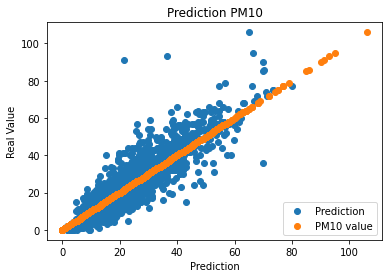

[27.155, 21.722500000000004, 50.222499999999975, 55.05500000000001, 16.54249999999998, 66.35250000000006, 9.069999999999933, 41.87, 24.52, 46.929999999999986, 47.15000000000002, 19.967499999999987, 38.87, 14.625000000000002, 40.735000000000014, 14.227499999999992, 61.819999999999936, 21.67999999999998, 13.765000000000015, 10.792500000000022, 15.250000000000005, 14.437499999999995, 14.0125, 12.854999999999993, 33.31500000000001, 63.457500000000024, 51.39499999999998, 66.84999999999998, 47.445000000000014, 20.492500000000007, 26.1875, 21.21750000000001, 52.08499999999992, 33.46249999999999, 33.120000000000005, 45.80249999999999, 24.277500000000003, 30.045, 62.39750000000011, 9.90499999999999, 17.38499999999999, 40.449999999999996, 21.770000000000014, 9.02249999999993, 13.984999999999982, 42.412499999999966, 18.059999999999985, 9.227499999999996, 10.600000000000048, 23.849999999999998, 31.784999999999997, 50.27749999999995, 11.402499999999954, 47.58999999999999, 8.047499999999896, 39.5849

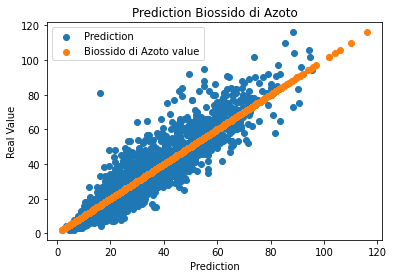

[23.22750000000004, 65.77499999999995, 22.524999999999952, 11.66749999999994, 113.1649999999999, 8.197500000000097, 92.24999999999983, 22.077499999999997, 57.31000000000003, 3.562500000000213, 13.975000000000026, 36.15749999999999, 21.98500000000003, 57.18750000000001, 3.1675000000002242, 68.7, 9.617500000000021, 77.73749999999997, 124.29250000000036, 98.00000000000006, 82.08250000000001, 100.93500000000006, 47.355000000000004, 96.75249999999986, 41.315, 4.435000000000336, 6.685000000000073, 4.637500000000152, 3.230000000000203, 50.02, 86.71499999999992, 54.08999999999999, 16.219999999999995, 52.87750000000001, 62.452500000000036, 2.870000000000246, 31.25999999999999, 44.76, 3.810000000000265, 48.30499999999999, 55.81749999999998, 2.5975000000002666, 16.02749999999997, 94.91999999999999, 55.05749999999999, 2.852500000000248, 71.72999999999996, 80.23500000000001, 99.59500000000006, 12.294999999999945, 18.884999999999945, 8.287500000000037, 110.71499999999965, 20.170000000000016, 54.8924

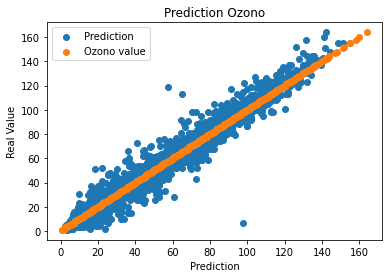

[1.1474999999999942, 1.5974999999999966, 1.855, 1.764999999999999, 1.352499999999997, 2.5324999999999984, 1.1074999999999944, 1.6424999999999972, 1.132499999999994, 4.544999999999998, 4.614999999999988, 1.699999999999998, 3.004999999999999, 0.9949999999999952, 4.2549999999999955, 1.0424999999999938, 2.9074999999999993, 1.1274999999999948, 1.3174999999999966, 1.5549999999999964, 1.1649999999999952, 1.1399999999999948, 1.0224999999999942, 0.9999999999999949, 2.362499999999998, 6.795, 3.2724999999999995, 2.61, 4.212499999999995, 2.13, 4.057499999999991, 1.029999999999994, 1.5024999999999957, 1.2199999999999953, 3.192499999999998, 3.4625, 1.242499999999997, 2.1999999999999997, 7.000000000000011, 1.2949999999999964, 0.997499999999997, 2.900000000000002, 1.2099999999999962, 1.0024999999999946, 1.1549999999999943, 3.527499999999999, 1.187499999999996, 0.9574999999999976, 1.3374999999999964, 1.414999999999997, 1.0849999999999935, 3.837499999999999, 1.0024999999999946, 2.055, 0.2099999999999906

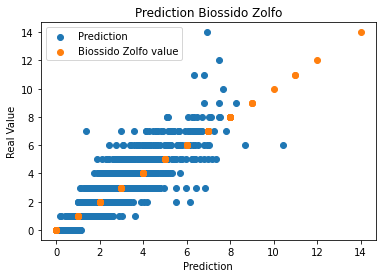

[0.9107500000000001, 0.8365000000000002, 1.1932500000000004, 1.2392500000000002, 0.6894999999999997, 1.3057499999999995, 0.6250000000000004, 1.0549999999999995, 0.9567500000000003, 1.0860000000000003, 1.17375, 0.83475, 1.104999999999999, 0.6077500000000005, 1.333, 0.7274999999999999, 1.0597499999999997, 0.72825, 0.6962499999999996, 0.5940000000000007, 0.6749999999999997, 0.5745000000000002, 0.8207500000000001, 0.5997499999999997, 1.0172499999999998, 1.7689999999999952, 1.3057499999999995, 1.6209999999999964, 1.4565000000000006, 0.6055000000000001, 0.9507500000000003, 0.83525, 1.1807500000000002, 1.0345, 1.0937499999999993, 1.5077500000000013, 0.7952500000000002, 1.0407499999999996, 1.8064999999999967, 0.6594999999999995, 0.7810000000000001, 1.3680000000000008, 0.7710000000000002, 0.5462499999999992, 0.5227499999999977, 1.4549999999999994, 0.6667499999999995, 0.6462499999999995, 0.5705000000000002, 0.7872500000000002, 0.6679999999999997, 1.3225000000000007, 0.7202499999999998, 0.7170000

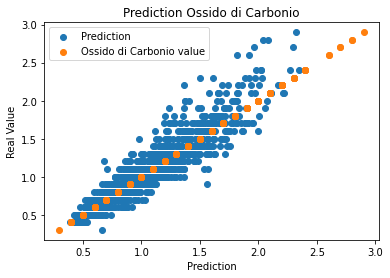

In [ ]:
predictions = doML()

In [ ]:
predictions

array([[ 8.09 , 25.55 , 24.56 ,  1.15 ,  0.902],
       [13.61 , 21.19 , 65.68 ,  1.6  ,  0.83 ],
       [22.58 , 44.81 , 24.92 ,  2.46 ,  1.156],
       ...,
       [62.77 , 71.41 ,  5.16 ,  3.2  ,  1.042],
       [17.13 , 28.13 ,  4.45 ,  1.13 ,  0.984],
       [29.49 , 56.03 ,  3.2  ,  4.41 ,  1.457]])